Central questions: can classifiers be trained using neuroimaging meta-analysis data (i.e., coordinates, modeled activation maps, etc.). 
Goals: [1] train classifier using coordinates/modeled activation maps, [2]...

In [1]:
# Import libraries and packages.
import pandas as pd
import numpy as np
import sklearn as skl
import glob
import datetime; today = datetime.date.today()
from nimare.io import convert_sleuth_to_dataset
from nimare.meta.cbma.kernel import ALEKernel

In [2]:
# Select directories and files structure.
input_prefix = str(today)
output_prefix = str(today)
in_dir = 'constructs'
out_dir = 'out'
paths = glob.glob("constructs/*.txt")
print('constructs to model = {0}'.format(len(paths)))

constructs to model = 8


In [3]:
# Convert coordinates to nimare dataset. DOES NOT WORK!
datas = {}
for path in paths:  
    print(path)
    datas[path[len(in_dir)+1:-4]] = convert_sleuth_to_dataset(path)

constructs/psolving.txt
constructs/films.txt
constructs/delayed.txt
constructs/reward.txt
constructs/emotion.txt
constructs/tmind.txt
constructs/stroop.txt
constructs/nback.txt


In [4]:
datas.keys() # Confirm construct keys.

dict_keys(['psolving', 'films', 'delayed', 'reward', 'emotion', 'tmind', 'stroop', 'nback'])

In [5]:
# Make modeled activation (MA) maps.
print('MA maps making...\t\t@{0}'.format(str(datetime.datetime.now())))
ma_maps_arrs = {}
for data in datas.keys():
    kern = ALEKernel()
    ma_maps = kern.transform(datas[data]) # Compute MA maps (len = ???)
    ma_maps_arrs[data] = []
    for i in np.arange(0, len(ma_maps)):
        ma_maps_arrs[data].append(np.ravel(ma_maps[i].get_data(), order='C'))
    labels = pd.DataFrame(index=datas[data].ids)
print('MA maps done!\t\t\t@{0}'.format(str(datetime.datetime.now())))
#print('MA maps = {0}'.format(len(ma_maps_arr)))
#print('MA maps shape = {0}'.format(ma_maps_array.shape))



MA maps making...		@2019-08-07 10:18:44.021486
MA maps done!			@2019-08-07 10:19:20.023158


In [6]:
keys = list(datas.keys())
dataframes = {}
key = {}
for i in np.arange(0,len(keys)):
    key[keys[i]] = i
    arr = np.asarray(ma_maps_arrs[keys[i]])
    dataframes[i] = pd.DataFrame(arr)
    dataframes[i]['y'] = i

In [7]:
all_data = pd.concat([dataframes[0], dataframes[1]], ignore_index=True)

for i in np.arange(2,len(dataframes.keys())):
    all_data = pd.concat([all_data, dataframes[i]], ignore_index=True)

In [8]:
all_data

,0,1,2,3,4,5,6,7,8,9,...,902620,902621,902622,902623,902624,902625,902626,902627,902628,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
unique_classes = np.unique(all_data['y'])

In [21]:
test_classes = unique_classes[:2]
test_classes

array([0, 1])

In [22]:
data_2classes = all_data.loc[all_data['y'].isin(test_classes)]
data_2classes.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,902620,902621,902622,902623,902624,902625,902626,902627,902628,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
from sklearn import decomposition
import matplotlib.pyplot as plt
pca = decomposition.PCA(n_components=50)
y = data_2classes.iloc[:,-1]
X_raw = all_data.iloc[:,:-1]
X_raw.shape
pca.fit(X_raw)

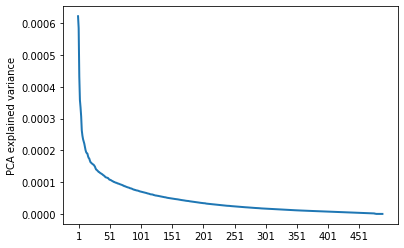

489

In [44]:
plt.plot(pca.explained_variance_, linewidth=2)
plt.ylabel('PCA explained variance')
plt.xticks(np.arange(1, 501, 50))
plt.show()
pca.n_components_

In [ ]:
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
X = pca.transform(data_2classes.iloc[:,:-1])
clf = RidgeClassifier(alpha=50)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))